In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Primo esempio di normalizzazione

In [2]:
altezze=np.random.normal(176, 5, 30)
altezze

array([162.91271766, 170.87739323, 174.21843747, 183.78365922,
       172.75540969, 164.67153758, 182.50069771, 172.96613747,
       172.31994307, 174.22319734, 172.91546331, 170.98560144,
       174.32136269, 179.74305472, 178.2511359 , 181.20852814,
       179.60133535, 180.78652848, 181.17314247, 175.67587341,
       181.09219185, 173.73448658, 171.43943149, 168.66491093,
       178.1858073 , 183.41789799, 168.49341916, 177.62958219,
       174.24112675, 177.13256766])

In [3]:
np.mean(altezze)

175.33075260820624

In [4]:
np.std(altezze)

5.2603685530493705

In [5]:
temp = altezze- np.mean(altezze)
np.mean(temp)
#funzione lineare

-4.9264296346033615e-14

In [6]:
np.std(temp)

5.2603685530493705

In [7]:
altezze_normalizzate=(altezze-np.mean(altezze))/np.std(altezze)

In [8]:
np.std(altezze_normalizzate)

1.0

In [9]:
np.mean(altezze_normalizzate)

-9.348077867343818e-15

In [10]:
#l'algoritmo viene addestrato con quelle normalizzate e non ne risente

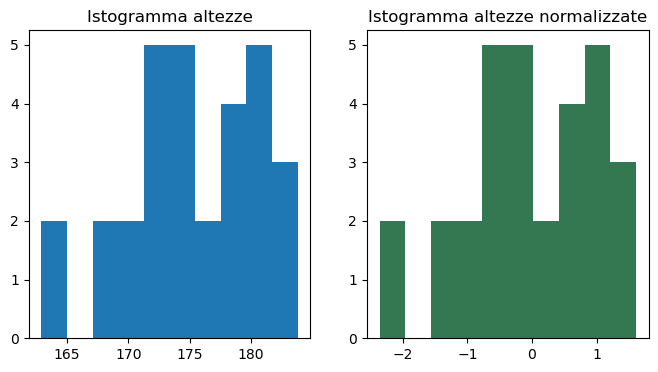

In [11]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
axs[0].hist(altezze, bins=10)
axs[1].hist(altezze_normalizzate,color=np.random.uniform(0,1,3), bins=10)
axs[0].set_title("Istogramma altezze")
axs[1].set_title("Istogramma altezze normalizzate")

plt.show()

l'unica differenza è l'asse x: scalato e traslato.la froma è idenmtica e il ml imoara dalla distribuzione dei dati, dalla loro forma

### esempio due: normalizzare il consumo di carburante del data set delle auto

In [12]:
data_set=pd.read_csv("./Fuel_Consumption_2000-2022.csv")
emissioni=data_set["FUEL CONSUMPTION"].values

In [13]:
emissioni_normallizate=(emissioni-np.mean(emissioni))/np.std(emissioni)

In [14]:
np.mean(emissioni_normallizate)

-2.520101917929066e-17

In [15]:
np.std(emissioni_normallizate)

1.0

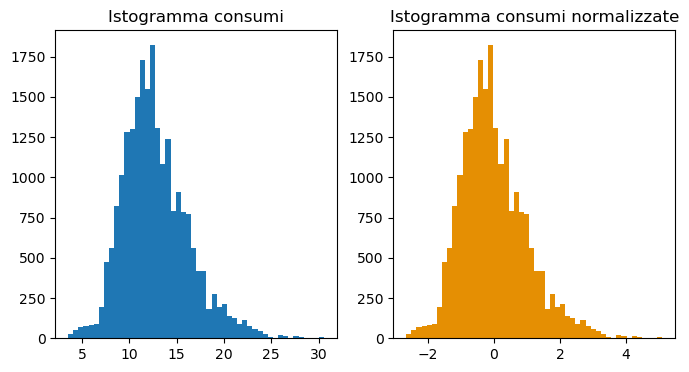

In [17]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
axs[0].hist(emissioni, bins=50)
axs[1].hist(emissioni_normallizate,color=np.random.uniform(0,1,3), bins=50)
axs[0].set_title("Istogramma consumi")
axs[1].set_title("Istogramma consumi normalizzate")

plt.show()

In [41]:
pinguini=pd.read_csv("./penguins_size.csv")
species=pinguini["species"].unique()
dizionario={}
for specie in species:
    dizionario[specie]=np.random.uniform(0, 1,3)
colors=[]
for specie in pinguini["species"].values:
    colors.append(dizionario[specie])
species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

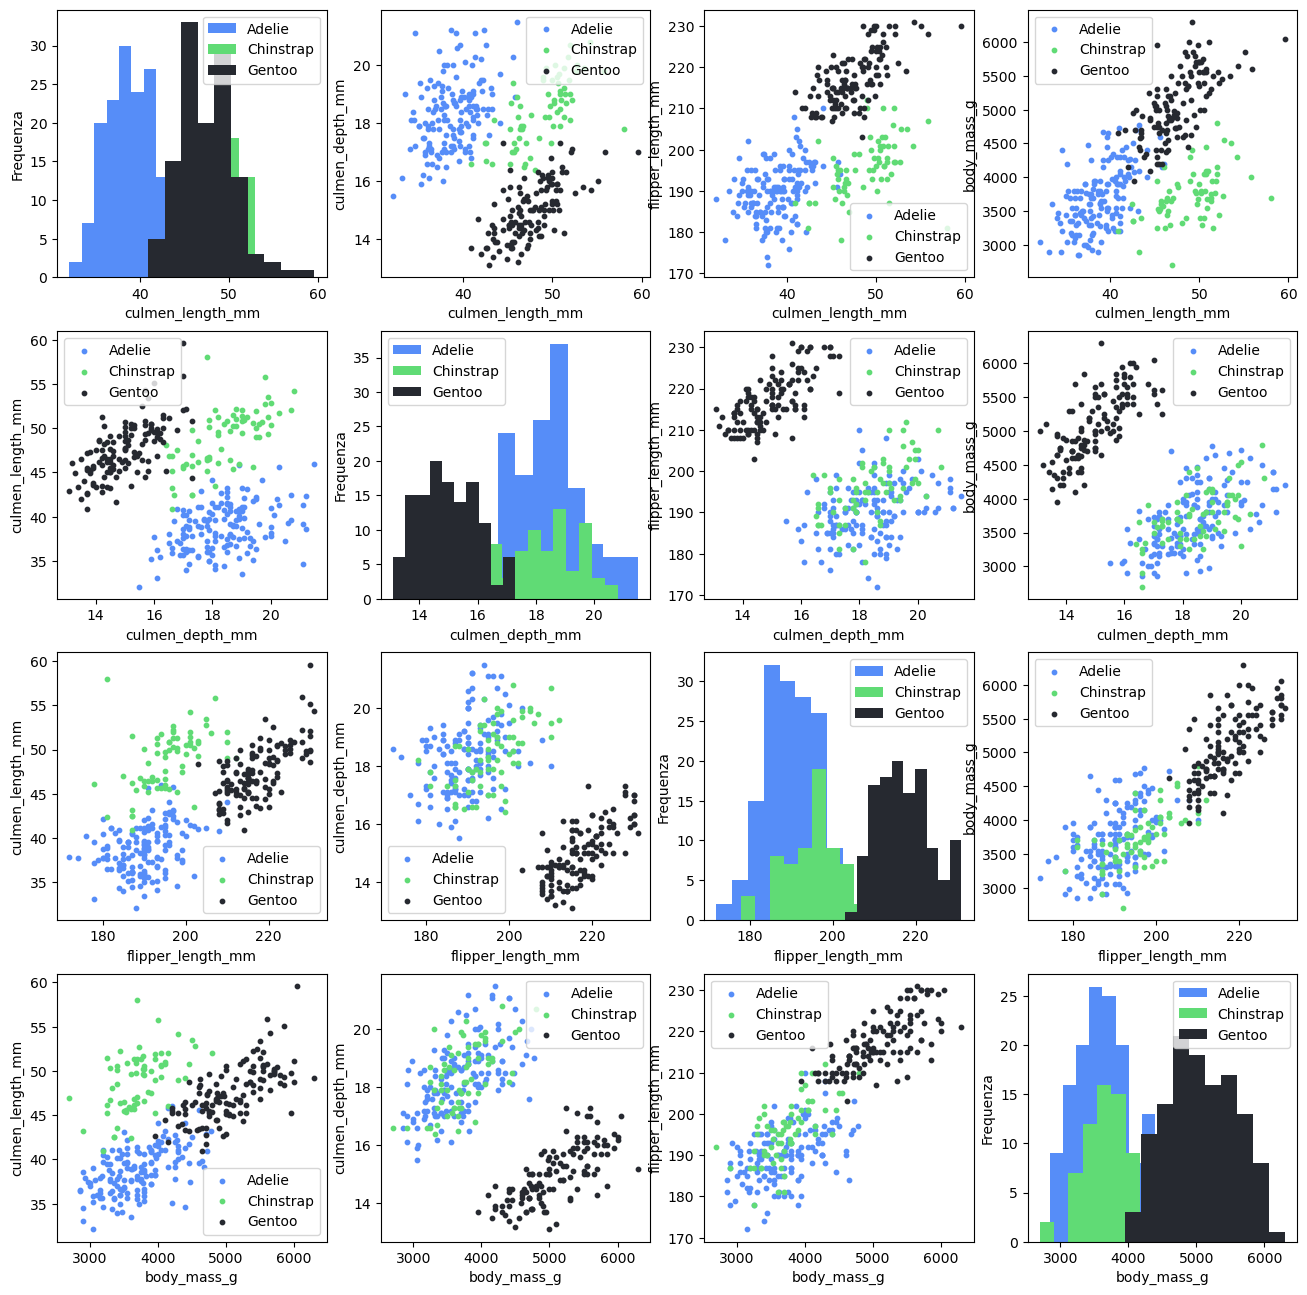

In [56]:
variaibili_utili=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
fig, axs=plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        if i==j:
            for specie in species:
                axs[i, j].hist(pinguini[pinguini["species"]==specie][variaibili_utili[i]].values, color=dizionario[specie],  label=specie)
 

                axs[i, j].set_xlabel(variaibili_utili[i])
                axs[i, j].set_ylabel("Frequenza")
                axs[i, j].legend()


        else:
            for specie in species:
                axs[i, j].scatter(pinguini[pinguini["species"]==specie][variaibili_utili[i]].values, pinguini[pinguini["species"]==specie][variaibili_utili[j]].values, color=dizionario[specie], s=10, label=specie)
         

                axs[i, j].set_xlabel(variaibili_utili[i])
                axs[i, j].set_ylabel(variaibili_utili[j])
                axs[i, j].legend()

            
                

                
    
plt.show()

In [8]:
def analisi_grafica(data_frame, target_name, lista_variabili_quantitative, dropna=True, alpha=0.5):
    '''
        la funzione analisi_grafica crea un'analisi grafica delle colonne quantitative di un dataframe:

        crea n*n grafici dove n è uguale alla lunghezza di "lista_variabili_quantitative". I grafici che genera sono:
        - istogrammi quando si tratta  della stessa variabile
        - grafici a dispersione quando si tratta di variabili diverse

        INPUT:
        -data_frame: data frame letto con pandas
        -target_name: nome della colonna dataframe su cui effetturare il riconoscimeto
        -lista_variabili_quantitative: lista contente i nomi delle colonne quantitative del dataframe
        
        RETURN:
        -analisi grafica del dataframe: figura contenente grafici a 
        dispersione e istogrammi delle varibili quantitative con colori 
        diversi in base al valore del target
        
        '''
    data_frame_copy=data_frame.copy()
    if dropna:
        
        data_frame_copy[lista_variabili_quantitative+[target_name]].dropna(inplace=True)
    
    unique_target_values=data_frame_copy[target_name].unique()
    target_values_color={}
    nrows, ncols=len(lista_variabili_quantitative), len(lista_variabili_quantitative)
    for value in unique_target_values:
        target_values_color[value]=np.random.uniform(0, 1,3)
    fig, axs=plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*nrows, ncols*ncols))
    for i in range(nrows):
        for j in range(ncols):
            if i==j:
                for value in unique_target_values:
                    axs[i, j].hist(data_frame_copy[data_frame_copy[target_name]==value][lista_variabili_quantitative[i]].values, color=target_values_color[value],  label=value, alpha=alpha)


                    axs[i, j].set_xlabel(lista_variabili_quantitative[i])
                    axs[i, j].set_ylabel("Frequenza")
                    axs[i, j].legend()


            else:
                for value in unique_target_values:
                    axs[i, j].scatter(data_frame_copy[data_frame_copy[target_name]==value][lista_variabili_quantitative[i]].values, data_frame_copy[data_frame_copy[target_name]==value][lista_variabili_quantitative[j]].values,   color=target_values_color[value],  alpha=alpha, label=value)


                axs[i, j].set_xlabel(lista_variabili_quantitative[i])
                axs[i, j].set_ylabel(lista_variabili_quantitative[j])
                axs[i, j].legend()

            
                

                
    
    plt.show()
        
        

C:\Users\MATTEO MIGLIORE\AppData\Local\Temp\ipykernel_20052\903923059.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_copy[lista_variabili_quantitative+[target_name]].dropna(inplace=True)


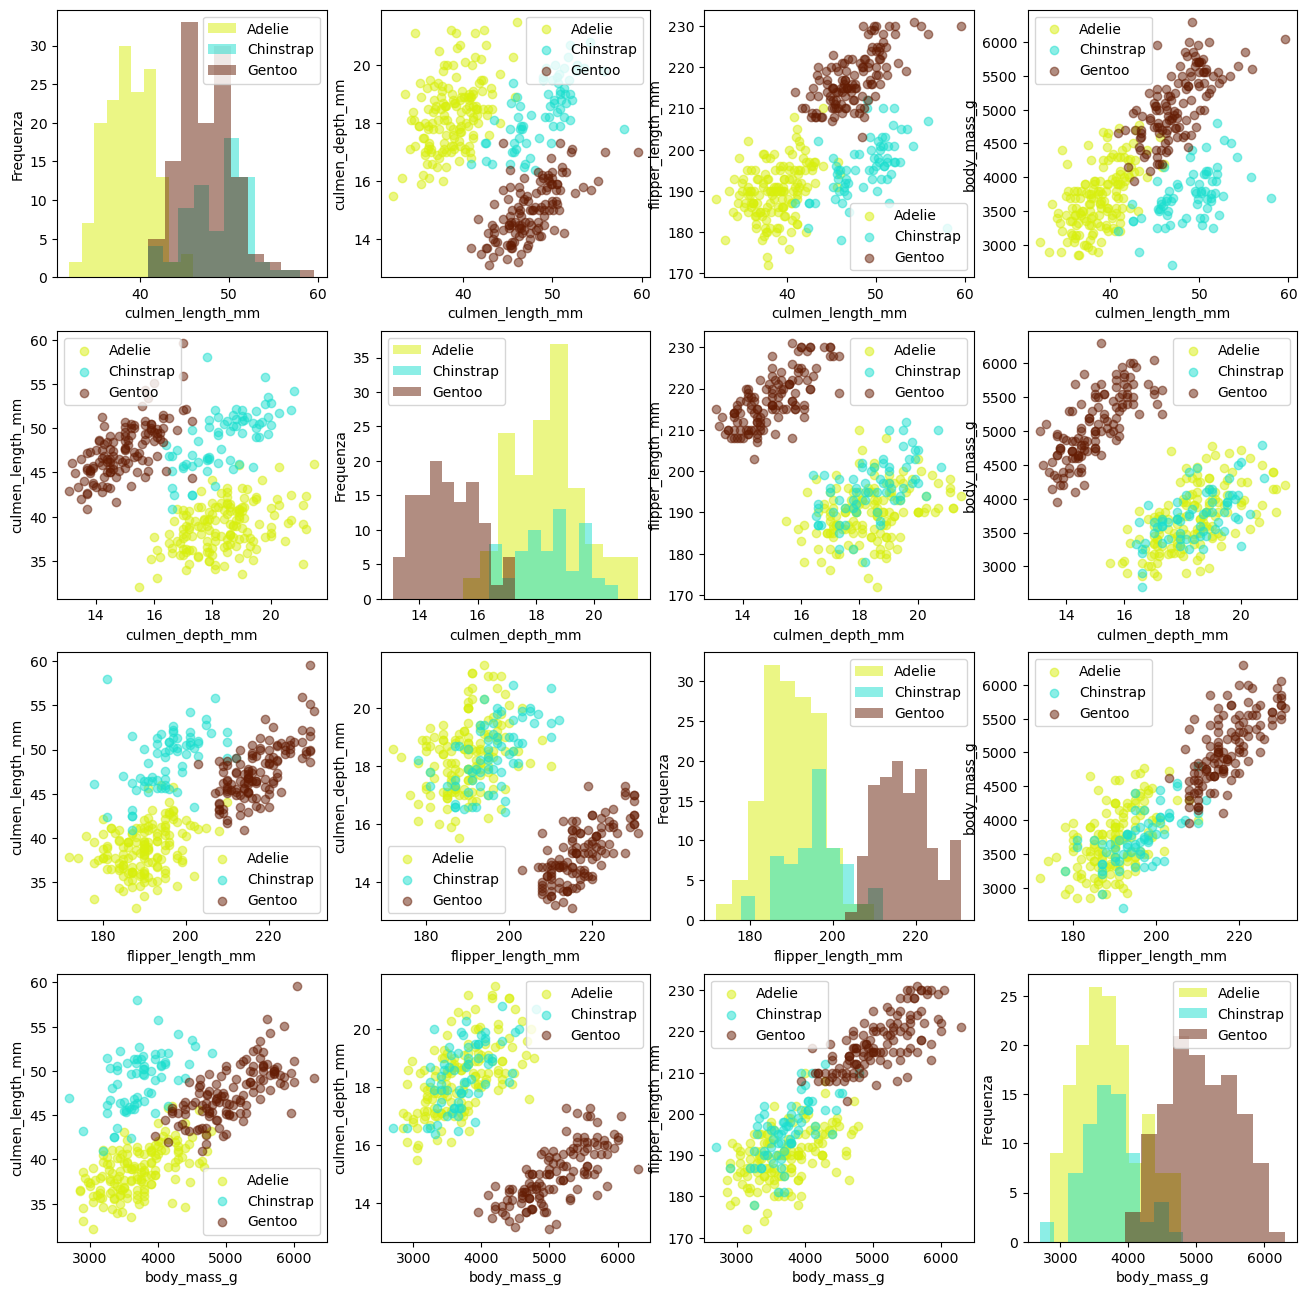

In [9]:
variaibili_utili=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
target="species"
data_frame=pd.read_csv("./penguins_size.csv")
analisi_grafica(data_frame, target, variaibili_utili)

In [18]:
analisi_grafica?